In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
def kernal(point,xmat,k):
    m,n=np.shape(xmat)
    weights = np.mat(np.eye((m)))
    for j in range(m):
        diff=point-x[j]
        weights[j,j]= np.exp(diff*diff.T/(-2.0*k**2))
    return weights

In [68]:
def localweight(point,xmat,ymat,k):
    wt=kernal(point,xmat,k)
    w=(x.T*(wt*x)).I*(x.T*wt*ymat.T)
    return w

In [69]:
def localweightregression(xmat,ymat,k):
    m,n=np.shape(xmat)
    ypred=np.zeros(m)
    for i in range(m):
        ypred[i]=xmat[i]*localweight(xmat[i],xmat,ymat,k)
        print(ypred[i])
    return ypred

(244, 2)
2.8960007216391856
1.7979267569047923
3.452292301060975
3.524698788302377
3.5573553344804765
4.303665126291193
1.7454203289968069
3.372831596490286
2.4478558140131237
2.4888078229904838
1.8083103982975548
4.797679834957084
2.40622420371336
2.968920920540506
2.48153632928321
3.602969248829514
1.799158249394954
2.6966312151747527
2.894340192347239
3.3127115359574972
2.990014878117036
3.164550547441382
2.4509291288634287
5.815651077303819
3.0184115812089205
2.9702853615121727
2.258921376344591
2.027644799427946
3.607938987038349
2.9725269487252897
1.9548488119330605
2.9919432245739213
2.4446416820083536
3.3292012301658627
2.9649995102763453
3.2175576472251493
2.7072132025803413
2.890666083912382
2.8852030530625896
4.2462983914892245
2.5613853271969127
2.924312055649982
2.45419459855231
1.9565077687805923
3.7613434904766114
3.0045574083689326
3.539018171829758
4.091799732252461
3.662909677595866
3.0080864646177607
2.0045737964145514
1.8049301364386823
4.747413529088234
1.897927221

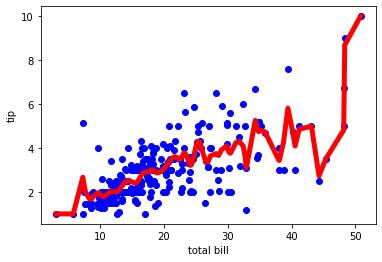

In [70]:
data=pd.read_csv('tips.csv')
cola=np.array(data.total_bill)
colb=np.array(data.tip)
mcola=np.mat(cola)
mcolb=np.mat(colb)
m=np.shape(mcolb)[1]
one=np.ones((1,m),dtype=int)
x=np.hstack((one.T,mcola.T))
print(x.shape)
ypred=localweightregression(x,mcolb,0.5)
xsort=x.copy()
xsort.sort(axis=0)
plt.scatter(cola,colb,color='blue')
plt.plot(xsort[:,1],ypred[x[:,1].argsort(0)],color='red',linewidth=5)
plt.xlabel('total bill')
plt.ylabel('tip')
plt.show()
